**IMPORTAMOS LIBRERIAS**

In [186]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

***1. Haremos el Scraping de Videojuegos_acreditados_como_los_mejores_de_todos_los_tiempos***

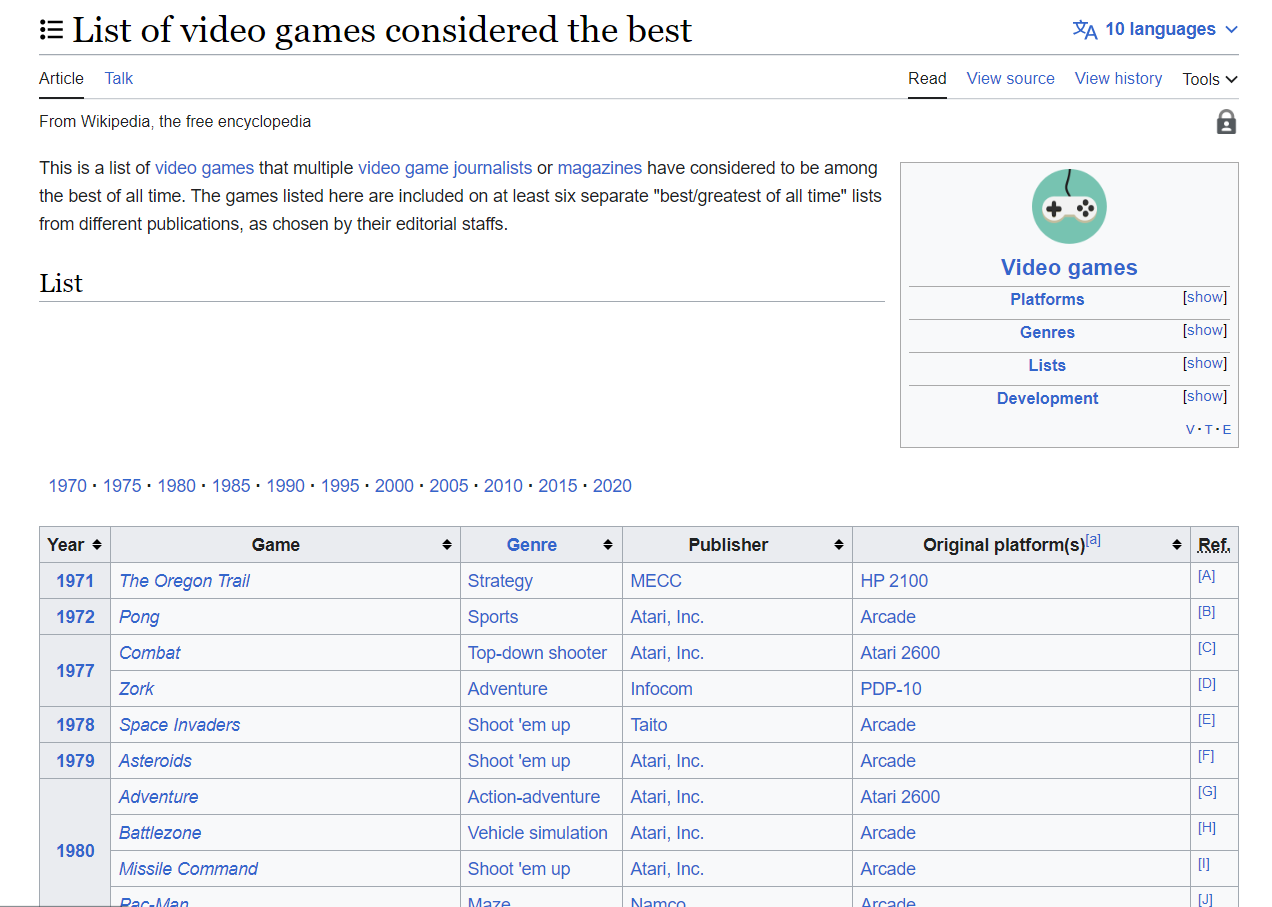

In [187]:
#URL DE LA PAGINA
url = 'https://es.wikipedia.org/wiki/Anexo:Videojuegos_acreditados_como_los_mejores_de_todos_los_tiempos'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

#SE IMPRIME EL HTML ORIGINAL
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Anexo:Videojuegos acreditados como los mejores de todos los tiempos - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clien

In [188]:
#ENCONTRAREMOS LA ETIQUETA DEL HTML
soup.find('table')

<table class="wikitable sortable" style="text-align:center;">
<tbody><tr>
<th scope="col">Año
</th>
<th scope="col">Videojuego
</th>
<th scope="col"><a href="/wiki/G%C3%A9nero_de_videojuegos" title="Género de videojuegos">Género</a>
</th>
<th scope="col">Distribuidora
</th>
<th scope="col">Plataforma Original
</th>
<th class="unsortable" scope="col">Referencia(s)
</th></tr>
<tr>
<th>1971
</th>
<td><i><a href="/wiki/Oregon_Trail_(videojuego)" title="Oregon Trail (videojuego)">Oregon Trail</a></i>
</td>
<td><a href="/wiki/Videojuego_de_estrategia" title="Videojuego de estrategia">Estrategia</a>
</td>
<td><a class="new" href="/w/index.php?title=MECC&amp;action=edit&amp;redlink=1" title="MECC (aún no redactado)">MECC</a>
</td>
<td><a href="/wiki/HP_2100" title="HP 2100">HP 2100</a>
</td>
<td><sup class="reference separada" id="cite_ref-FOOTNOTENavarro2007Mott2013FitzpatrickPullenRaabGrossman2016Aamoth20122GamesTM2018Marks2018Polygon20174MooreSchubak2019_1-0"><a href="#cite_note-FOOTNOTENav

In [189]:
#ENCONTRAREMOS TODAS LAS ETIQUETA DEL HTML
soup.find_all('table')

[<table class="wikitable sortable" style="text-align:center;">
 <tbody><tr>
 <th scope="col">Año
 </th>
 <th scope="col">Videojuego
 </th>
 <th scope="col"><a href="/wiki/G%C3%A9nero_de_videojuegos" title="Género de videojuegos">Género</a>
 </th>
 <th scope="col">Distribuidora
 </th>
 <th scope="col">Plataforma Original
 </th>
 <th class="unsortable" scope="col">Referencia(s)
 </th></tr>
 <tr>
 <th>1971
 </th>
 <td><i><a href="/wiki/Oregon_Trail_(videojuego)" title="Oregon Trail (videojuego)">Oregon Trail</a></i>
 </td>
 <td><a href="/wiki/Videojuego_de_estrategia" title="Videojuego de estrategia">Estrategia</a>
 </td>
 <td><a class="new" href="/w/index.php?title=MECC&amp;action=edit&amp;redlink=1" title="MECC (aún no redactado)">MECC</a>
 </td>
 <td><a href="/wiki/HP_2100" title="HP 2100">HP 2100</a>
 </td>
 <td><sup class="reference separada" id="cite_ref-FOOTNOTENavarro2007Mott2013FitzpatrickPullenRaabGrossman2016Aamoth20122GamesTM2018Marks2018Polygon20174MooreSchubak2019_1-0"><a hr

In [190]:
#ENCONTRAREMOS LA PRIMERA ETIQUETA DE TIPO TABLE DEL HTML
table = soup.find_all('table')[0]

In [191]:
#ENCONTRAREMOS LA ETIQUETA TH PARA OBTENER LOS TITULOS DE LA TABLA DEL HTML
world_titles = soup.find_all('th')

In [192]:
#ENCONTRAREMOS LOS TITULOS DE LA TABLA DEL HTML
world_table_titles = [title.text for title in world_titles]
print(world_table_titles)

['Año\n', 'Videojuego\n', 'Género\n', 'Distribuidora\n', 'Plataforma Original\n', 'Referencia(s)\n', '1971\n', '1972\n', '1977\n', '1978\n', '1979\n', '1980\n', '1981\n', '1982\n', '1984\n', '1985\n', '1986\n', '1987\n', '1988\n', '1989\n', '1990\n', '1991\n', '1992\n', '1993\n', '1994\n', '1995\n', '1996\n', '1997\n', '1998\n', '1999\n', '2000\n', '2001\n', '2002\n', '2003\n', '2004\n', '2005\n', '2006\n', '2007\n', '2008\n', '2009\n', '2010\n', '2011\n', '2012\n', '2013\n', '2015\n', '2016\n', '2017\n', '2018\n', '2019\n', '2020\n']


In [193]:
#ELIMINAREMOS LOS CARACTERES DE FIN DE LOS TITULOS DE LA TABLA DEL HTML
world_table_titles = [title.text.strip() for title in world_titles]
print(world_table_titles)

['Año', 'Videojuego', 'Género', 'Distribuidora', 'Plataforma Original', 'Referencia(s)', '1971', '1972', '1977', '1978', '1979', '1980', '1981', '1982', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2015', '2016', '2017', '2018', '2019', '2020']


In [194]:
#GUARDAREMOS LOS TITULOS DE LA TABLA DEL HTML EN UN DATA FRAME
df = pd.DataFrame(columns=world_table_titles)
df

,Año,Videojuego,Género,Distribuidora,Plataforma Original,Referencia(s),1971,1972,1977,1978,...,2010,2011,2012,2013,2015,2016,2017,2018,2019,2020


In [195]:
#EL RECORRIDO PUSO LOS AÑOS DE LA PRIMERA COLUMNA COMO COLUMNAS INDEPENDIENTES
#SE PROCEDE A ELIMINAR ESAS COLUMNAS NO NECESARIAS 
#SE PROCEDE A ELIMINAR LA COLUMNA REFERENCIA POR QUE NO APORTARÁ UN VALOR IMPORTANTE
df = df.drop(df.columns[5:50], axis = 1)
#SE PROCEDE A ELIMINAR LA COLUMNA AÑO POR QUE NO APORTARÁ UN VALOR IMPORTANTE POR QUE SON UNICOS E IRREPETIBLES
df = df.drop(df.columns[0], axis = 1)

In [196]:
df

,Videojuego,Género,Distribuidora,Plataforma Original


In [197]:
#GUARDAREMOS LAS ETIQUETAS TIPO TR DE LAS TABLA DEL HTML PARA OBTENER LOS REGISTROS(FILAS)
column_data = table.find_all('tr')

In [198]:
column_data

[<tr>
 <th scope="col">Año
 </th>
 <th scope="col">Videojuego
 </th>
 <th scope="col"><a href="/wiki/G%C3%A9nero_de_videojuegos" title="Género de videojuegos">Género</a>
 </th>
 <th scope="col">Distribuidora
 </th>
 <th scope="col">Plataforma Original
 </th>
 <th class="unsortable" scope="col">Referencia(s)
 </th></tr>,
 <tr>
 <th>1971
 </th>
 <td><i><a href="/wiki/Oregon_Trail_(videojuego)" title="Oregon Trail (videojuego)">Oregon Trail</a></i>
 </td>
 <td><a href="/wiki/Videojuego_de_estrategia" title="Videojuego de estrategia">Estrategia</a>
 </td>
 <td><a class="new" href="/w/index.php?title=MECC&amp;action=edit&amp;redlink=1" title="MECC (aún no redactado)">MECC</a>
 </td>
 <td><a href="/wiki/HP_2100" title="HP 2100">HP 2100</a>
 </td>
 <td><sup class="reference separada" id="cite_ref-FOOTNOTENavarro2007Mott2013FitzpatrickPullenRaabGrossman2016Aamoth20122GamesTM2018Marks2018Polygon20174MooreSchubak2019_1-0"><a href="#cite_note-FOOTNOTENavarro2007Mott2013FitzpatrickPullenRaabGrossm

In [199]:
#PROCESO QUE GUARDA LOS REGISTROS DE CADA FILA EN DATA FRAME
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    lengh=len(df)
    df.loc[lengh] = individual_row_data[0:4]
    
df

,Videojuego,Género,Distribuidora,Plataforma Original
0,Oregon Trail,Estrategia,MECC,HP 2100
1,Pong,Deportes,Atari,Arcade
2,Zork,Aventura,Infocom,PDP-10
3,Space Invaders,Matamarcianos,Taito,Arcade
4,Asteroides,Matamarcianos,Atari,Arcade
...,...,...,...,...
179,Red Dead Redemption 2,Acción-aventura,Rockstar Games,"PC, PlayStation 4, Xbox One, Google Stadia"
180,Persona 5 Royal,Videojuego de rol,Atlus,PlayStation 4
181,Sekiro: Shadows Die Twice,Videojuego de acción-aventura,"From Software, Activision","PC, PlayStation 4, Xbox One, Google Stadia"
182,The Last of Us Part II,Acción-aventura,Sony Computer Entertainment,"PlayStation 4, PlayStation 5"


In [200]:
#GENERACIÓN DE ARCHIVO CSV OBTENIDO DE TABLA DE HTML
df.to_csv('Videojuegos_acreditados_como_los_mejores_de_todos_los_tiempos.csv')


***2. ANALISIS EXPLORATORIO***

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Videojuego           184 non-null    object
 1   Género               184 non-null    object
 2   Distribuidora        184 non-null    object
 3   Plataforma Original  184 non-null    object
dtypes: object(4)
memory usage: 7.2+ KB


In [202]:
df.dtypes #COLUMNAS DE TIPO CATEGÓRICOS

Videojuego             object
Género                 object
Distribuidora          object
Plataforma Original    object
dtype: object

In [203]:
df.shape #COMO YA SABIAMOS TIENE 4 COLUMNAS.

(184, 4)

In [204]:
df.describe() #DATOS ESTADISTICOS

,Videojuego,Género,Distribuidora,Plataforma Original
count,184,184,184,184
unique,183,42,53,39
top,God of War,Acción-aventura,Nintendo,PC
freq,2,31,30,38


In [205]:
#SE USARÁ UNA MASCARÁ POR QUE LAS AGRUPACION QUE SOLO TIENE  UN VALOR NO AYUDAN AL ANALISIS 
df2 = df.groupby(['Género'])['Género'].count()
mask = df2>1
print(df2[mask]) 

Género
Acción                                        5
Acción y Rol                                 10
Acción-aventura                              31
Aventura                                     10
Carreras                                      2
City-building                                 2
Estrategia en tiempo real                     5
Estrategia por turnos                         4
Horror de supervivencia                       6
Lucha                                         5
MMORPG                                        3
Matamarcianos                                 7
Plataformas                                  21
Racing                                        3
Ritmo                                         3
Rompecabezas                                  2
Sigilo                                        5
Simulación                                    2
Simulación espacial                           2
Videojuego de deportes                        4
Videojuego de rol                

In [206]:
#SE USARÁ UNA MASCARÁ POR QUE LAS AGRUPACION QUE SOLO TIENE  UN VALOR NO AYUDAN AL ANALISIS 
df2 = df.groupby(['Distribuidora'])['Distribuidora'].count()
mask = df2>1
print(df2[mask]) 

Distribuidora
2K Games                                   2
Activision                                 4
Atari                                      3
Atlus                                      2
Bethesda Softworks                         3
Blizzard Entertainment                     5
Broderbund                                 2
Capcom                                     7
Eidos Interactive                          3
Electronic Arts                            7
Konami                                     8
LucasArts                                  8
Maxis                                      2
MicroProse                                 2
Microsoft Game Studios                     6
Midway                                     3
Namco                                      5
Nintendo                                  30
Psygnosis                                  2
Rockstar Games                             8
Sega                                      10
Sierra Studios                           

In [207]:
#SE USARÁ UNA MASCARÁ POR QUE LAS AGRUPACION QUE SOLO TIENE  UN VALOR NO AYUDAN AL ANALISIS 
df2 = df.groupby(['Plataforma Original'])['Plataforma Original'].count()
mask = df2>1
print(df2[mask]) 

Plataforma Original
Arcade                                        21
Dreamcast                                      3
Game Boy                                       2
Game Boy Advance                               2
GameCube                                       4
Macintosh                                      3
NES                                            5
Nintendo 64                                    6
PC                                            38
PC, PlayStation 3, Xbox 360                    6
PC, PlayStation 4, Xbox One                    2
PC, PlayStation 4, Xbox One, Google Stadia     3
PC, Xbox 360                                   4
PlayStation                                   10
PlayStation 2                                 18
PlayStation 3                                  4
PlayStation 3, Xbox 360                        8
PlayStation 4                                  3
Sega Genesis                                   3
Sega Saturn                                    3


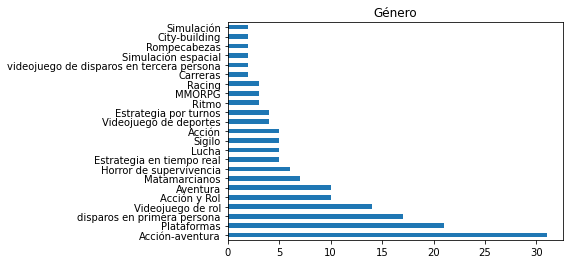

In [208]:
#USAREMOS EL GRÁFICO DE BARRAS PARA VER LAS CANTIDADES POR GÉNERO
df_genero = df['Género'].value_counts()
mask = df_genero>1
plot = df_genero[mask].plot(kind='barh',
                                            title='Género')


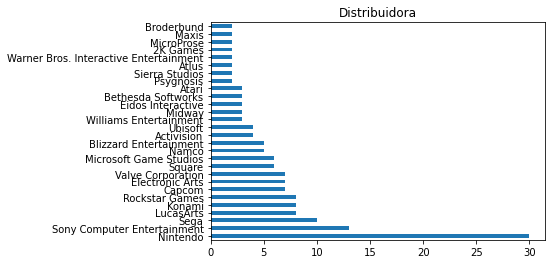

In [209]:
#USAREMOS EL GRÁFICO DE BARRAS PARA VER LAS CANTIDADES POR Distribuidora
df_distribuidora = df['Distribuidora'].value_counts()
mask = df_distribuidora>1
plot = df_distribuidora[mask].plot(kind='barh',
                                            title='Distribuidora')

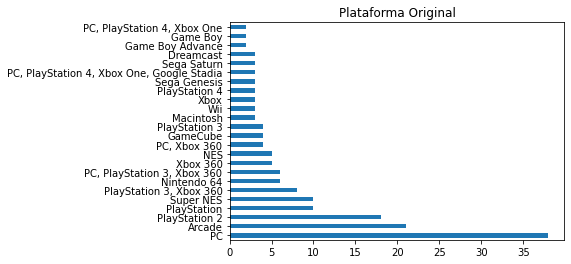

In [210]:
#USAREMOS EL GRÁFICO DE BARRAS PARA VER LAS CANTIDADES POR Plataforma
df_plataforma_org = df['Plataforma Original'].value_counts()
mask = df_plataforma_org>1
plot = df_plataforma_org[mask].plot(kind='barh',
                                            title='Plataforma Original')


In [211]:
#CON ESTE ANALISIS EXPLORATORIO OBTENIDO DE LA WEB, SE PUEDE VER QUE
# -  EN LA Plataforma Original HAY MAS JUEGOS GANADORES SON DE LA PLATAFORMA DE PC 
# -  EN LA Distribuidora HAY MAS JUEGOS GANADORES DE LA Distribuidora DE NINTENFO
# -  EN EL Genero HAY MAS JUEGOS GANADORES DE EL GÉNERO ACCIÓN AVENTURA
